# Detecting edges in text

In [1]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Staff201\AppData\Local\Tesseract-OCR\tesseract.exe'

In [3]:
img = cv2.imread('1.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

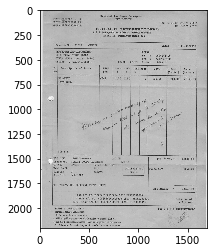

In [4]:
plt.imshow(img, cmap='gray')

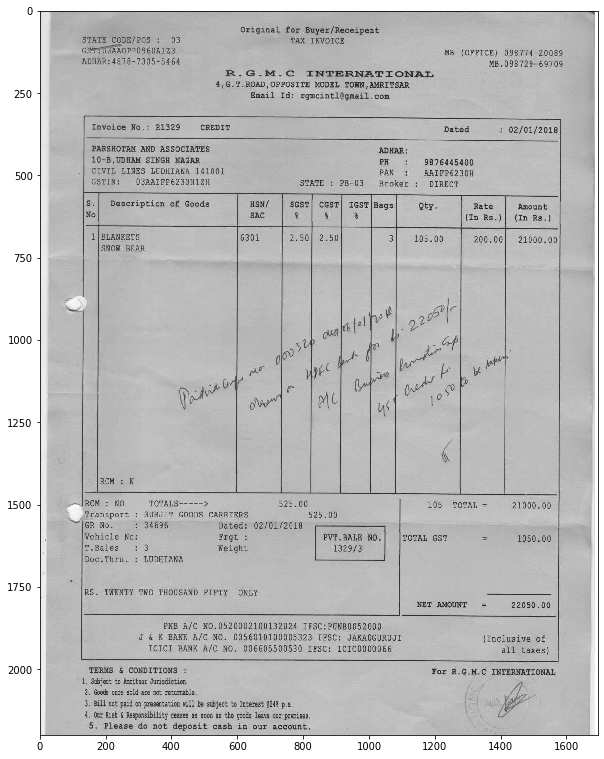

In [5]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(10,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

display(img, cmap='gray')

In [17]:
def preprocess(img):
    rgb = cv2.pyrDown(img)
    img = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
#     display(grad, cmap='gray')
    ret, thresh = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (19,3))
    connected = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel=kernel_rect)
#     display(connected, cmap='gray')
    ker = np.ones((3,3), dtype=np.uint8)
    dilated = cv2.dilate(connected, kernel=ker)
#     display(diluted, cmap='gray')
    
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    print(len(contours))
    
    mask = np.zeros(thresh.shape, dtype=np.uint8)
#     display(mask, cmap='gray')
    
    for idx in range(len(contours)):
        x,y,w,h = cv2.boundingRect(contours[idx])
        mask[y:y+h, x:x+w] = 0
        cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
        r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
        
        if r >0.45 and w > 8 and h > 8:
            tex = pytesseract.image_to_string(img[y:y+h, x:x+w])
#             ro = img[y-4:y+h+4, x-4:x+w+4]
#             display(ro, cmap='gray')
            cv2.rectangle(rgb, ((x),(y)), (x+(w),y+(h)), (0,255,0), 2)
            print(tex)
    display(rgb, cmap='gray')
#     return contours

In [30]:
# def preprocess(img, rect_kernel=(9,3)):
# #     rgb = cv2.pyrDown(img)
#     rgb = img.copy()
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
#     grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
# #     display(grad, cmap='gray')
#     ret, thresh = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, rect_kernel)
#     connected = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel=kernel)
# #     display(connected, cmap='gray')
    
#     contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#     print(len(contours))
    
#     mask = np.zeros(thresh.shape, dtype=np.uint8)
# #     display(mask, cmap='gray')
    
#     for idx in range(len(contours)):
#         x,y,w,h = cv2.boundingRect(contours[idx])
#         mask[y:y+h, x:x+w] = 0
#         cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
#         r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
        
#         if r >0.45 and w > 8 and h > 8:
# #             tex = pytesseract.image_to_string(img[y:y+h, x:x+w])
# #             ro = img[y-4:y+h+4, x-4:x+w+4]
# #             display(ro, cmap='gray')
#             cv2.rectangle(rgb, (x,y), (x+w,y+h), (0,255,0), 2)
# #             print(tex)
#     display(rgb, cmap='gray')
#     return contours

18

For R.G.M.C INTERNATIONAL
‘TERMS & CONDITIONS :

1, Subject to auritear Jrisdicticn.

2, Goods coce sold are ot returable

4. Bild aot paid on preeataticn will be subject to Interest #241 pa.

4. Oar Risk & Hespensibility ceases as seen as the goods Leave car prises.
5. Please do not deposit cash in our account.






Invoice No.: R1329 CREDIT Dated : 02/01/2018

 

 

 

 

 

 

   

 

   

 

 

 

 

   

 

PARSHOTAM AND ASSOCIATES ADEA:
10-B,UDHAM SINGH NAGAR PH 3 9876445400
CIVIL LINES LUDHIANA 141001 PAN AAIFP6230H
GSTIN: O3AATFP6230H12H STATE : PB-03 Broker : DIRECT
8.| Description of Goods sw/ | scst| cost| 1cst|Bags| ty. Rate | Amount
No ‘SAC s s s (In Rs.)| (In Rs.)
1/BLANKETS 6301 2.50] 2.50 105.00 200.00) 21000.00
SNOW BEAR
ale
gals! Me gee
5 fr etl .
yet ye y bly
“ oO
Sy wer q
°
Qe el us I
RCM: N
RCM : NO ‘TOTALS-- > 525.00 105 TOTAL = 21000.00
Transport : SURJIT GOODS CARRIERS 525.00
GR No. 34696 Dated: 02/01/2018
Vehicle Nc Frgt : TOTAL GST = 1050.00
T.Bales : Wei

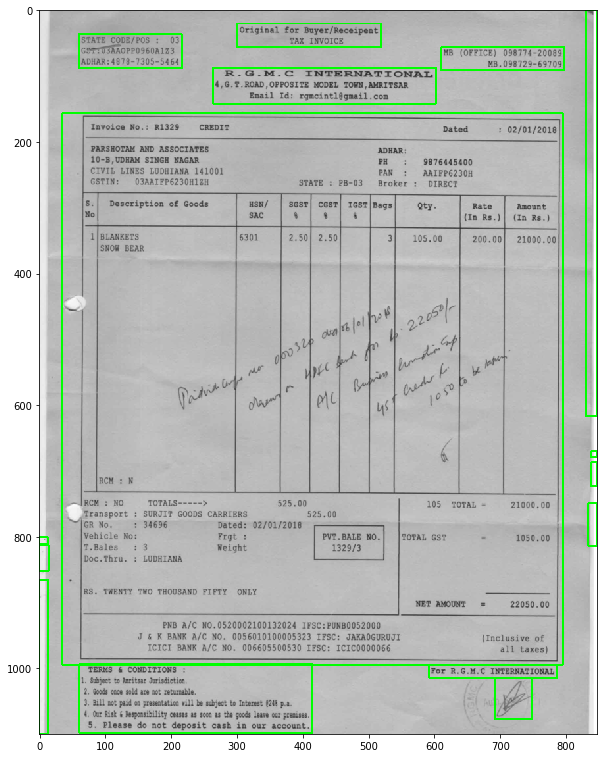

In [12]:
cnts = preprocess(img)

In [220]:
# def detection(img,contours):
#     mask = np.zeros(img.shape[:2], dtype=np.uint8)
#     for idx in range(len(contours)):
#         x,y,w,h = cv2.boundingRect(contours[idx])
#         mask[y:y+h, x:x+w] = 0
#         cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
#         r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
        
#         if r >0.45 and w > 8 and h > 8:
#             roi = img[y:y+h, x:x+w]
#             display(roi, cmap='gray')

In [13]:
img1 = cv2.imread('2.jpg')

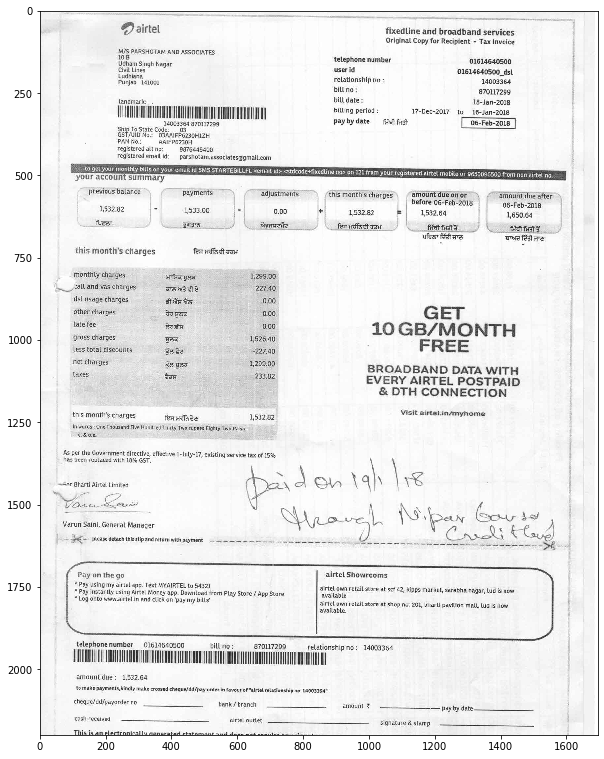

In [15]:
display(img1)

101

airtel outtet

 

signature & stamp
cash received
amount ©

 

— pay by date.
‘bank / branch:
cheque/dd/payorder no
amount due: 1,532.64
‘tomahe payments indy make crossed cheqoe//pay order in favour of "abel retationship no 14003364"
None number 01614640500

 
 

Felationship no: 14003364

Pap on the go airtel Showrooms

ay using my airtel app. Tet MYAIRTEL to $4321 iret own retalt store at st 42, hipps market, sarabna nagar, ld snow
{Pay instant using tl Money app. Download from Play Store / AppStore ‘vaiate

* Lag onto wamaitl in and click on pay my Bal

airtel own reat store at shop no: 201, bhartl pavilion mall, dis now
allabte
‘Varun Saini, General Manager





Kor Bharti Airtel Limited


As ber the Government directive, effective 1-July-I7, existing service tax of 15%
thas been replaced with 18% GST.
1,532.62
ee ee Ser yeS fen wists

‘wor: One Thewan FieManred Thirty Tm pes phy Two Pai
this month's charges
Visit airtelin/mynome
(233.82
taxes:
BROADBAND DATA WITH
EVERY AIRTE

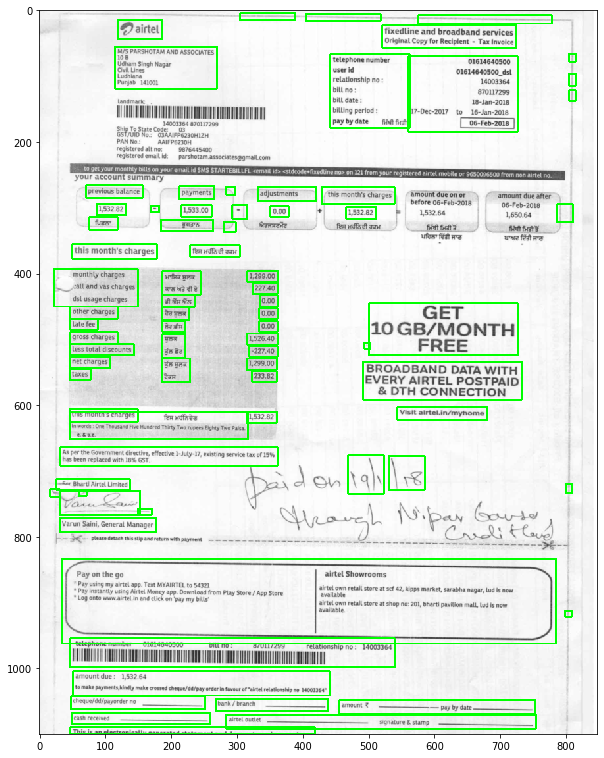

In [14]:
img1_cnts = preprocess(img1)

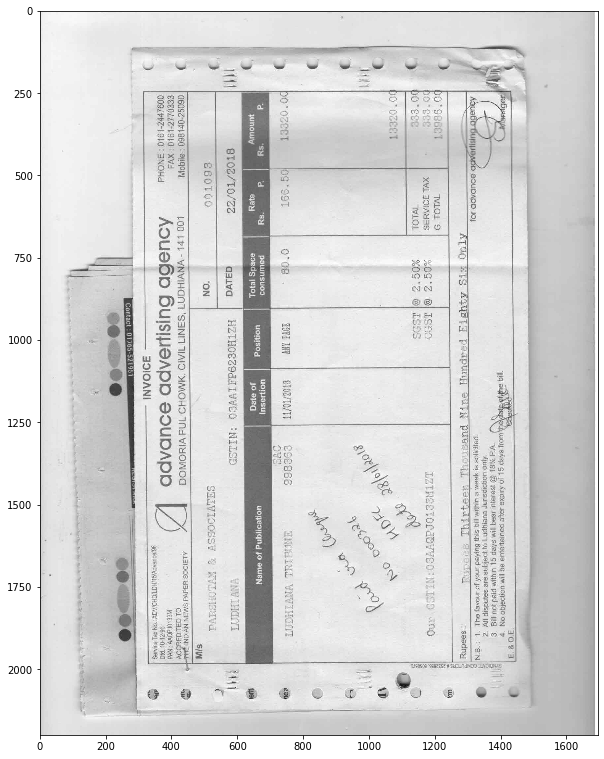

In [17]:
img2 = cv2.imread('3.jpg')
display(img2)

46






¢











te eter
























‘quo uoHRIpsun eveRYpN 01 oalgns Ove SOINGSHP YZ

 

 

 

 

    
     

  
 
 

 

 

Pry

         

  

yd WY B1OZ/TO/TT

 

 

 

 

      

 

 

 

 

8T0Z/T0/zz aaiva | HZTHOEZodaIv¥EO
e60t00 ‘ON
060S2-0r 1860 ah 100 LL - WNVIHGN1 "SANIT TIAID "MMOHO Nd VINOWOG
€LE0LLZ-1910 4
coxeisio aca = ©AOUCHD BulsiyeAPO SOUDAPD

{2OUOAPO 10} pongyos 5} yoam e UKM Ina Sin BuIKed snk jo unoNe} OWL“ -@N|
ATUO ETS AFUBTT Peapunyy SUTN Puy seedny
W1oL’9
Xvi 3010835, “OS*Z @| LSDO ‘0
WLOL xOS*Z @| LSOS

 

 

 

 

BOIOANI

 

 

        

>




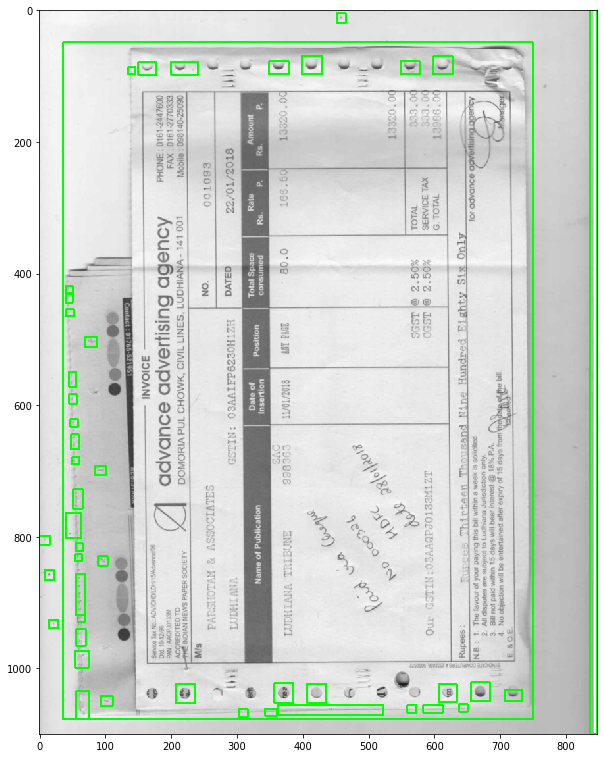

In [18]:
preprocess(img2)

In [21]:
cv2.imwrite('new_img.jpg',img)

True

In [18]:
bhatinda = cv2.imread('bhatinda.jpg')

3
This is a Computer Generated Invoice
PARSHOTAM & ASSOCIATES Invoice No.
10-B UDHAM SINGH NAGAR }233_______—‘ia-Mar-2018 _|
LUDHIANA Delivery Note Mode/Terms of Payment
GSTINIUIN: 03AAIFP6230H1ZH po
State Name : Punjab, Code : 03 Supplier's Ret. Other Reference(s)
E-Mail: INFO@PARSHOTAMANDASSOCIATES.COM cam charges
Buyer's Order No. Dated
Buyer
HDFC BANK BATHINDA BRANCH | eopetch Document Na. [Delivery Note Dats
BATHINDA
GSTINIUIN — : 03AAACH2702H1ZA |Deepstched trough |Deetnation
State Name: Punjab, Code : 03, me
Terms of Delivery
8 Particulars HSN/SAC | GST | Quantity | Rate | per! — Amount
ny Rate
1 Professional Charges (998221) 998221 | 18% 74,350.00
‘Cam Charges Feb 2018
2 cost 6,691.50
3 SST 6,691.50
Total % 87,733.00
Aunt Chargeable (words) E40E
Indian Rupees Eighty Seven Thousand Seven Hundred Thirty Three Only
HSN/SAC Taxable Central Tax State Tax Total
Value [Rate | Amount | Rate | Amount [Tax Amount

998221 74,350.00 9%|  6691.50| 9%| 6,691.50 | 13,383.00

Totall 74,350.00 

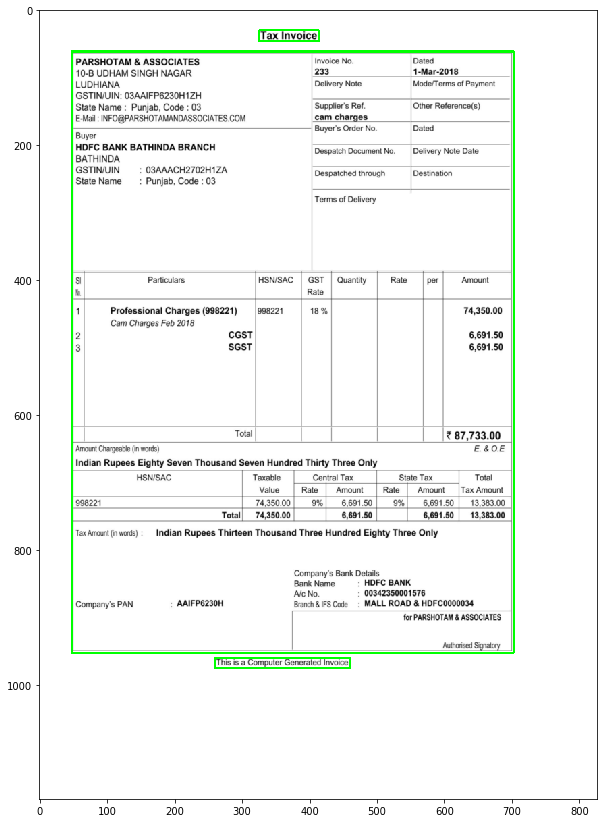

In [19]:
cntb = preprocess(bhatinda)